In [1]:
import numpy as np
import pandas as pd
from fancyimpute import KNN
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.


In [2]:
data = pd.read_excel('RealEstate.xlsx')
# data

In [3]:
data = data.drop(['No'],axis = 1)

In [7]:
cnames = data.columns

In [8]:
cnames

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x24fec8ec470>,
 'caps': [<matplotlib.lines.Line2D at 0x24fec8ecb00>,
 'boxes': [<matplotlib.lines.Line2D at 0x24fec8ec080>],
 'medians': [<matplotlib.lines.Line2D at 0x24fec8ecf28>],
 'fliers': [<matplotlib.lines.Line2D at 0x24fec8fe518>],
 'means': []}

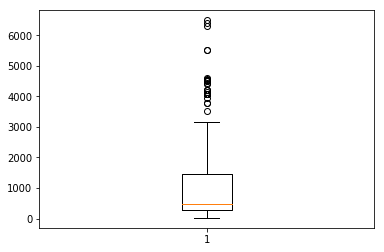

In [12]:
%matplotlib inline

plt.boxplot(data[cnames[2]])

In [13]:
data_copy = data.copy()

In [17]:
remove_data = []
for i in cnames:
    q75,q25 = np.percentile(data.loc[:,i],[75,25])
    iqr = q75 - q25
    
    min = q25-(iqr*1.5)
    max = q75 + (iqr*1.5)
    
    data_copy = data_copy.drop(data_copy[data_copy.loc[:,i]<min].index)
    data_copy = data_copy.drop(data_copy[data_copy.loc[:,i]>max].index)

In [18]:
data_copy.shape

(371, 7)

In [19]:
data.shape

(414, 7)

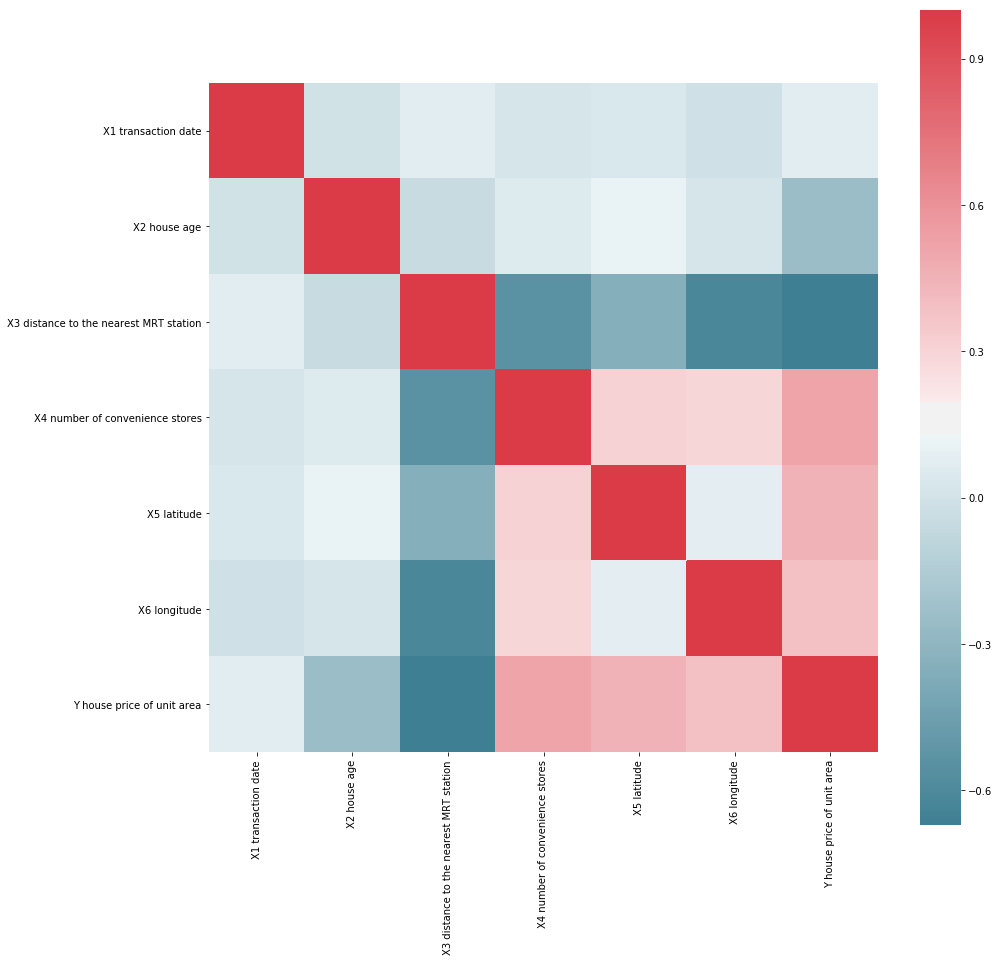

In [21]:
df_corr = data_copy.loc[:,cnames]

f,ax = plt.subplots(figsize=(15,15))

corr = df_corr.corr()

sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)

In [22]:
data_copy = data_copy.drop(['X3 distance to the nearest MRT station','X4 number of convenience stores'],axis = 1)

In [24]:
data_copy.to_csv('data_cleaned.csv', index=False)

In [27]:
X = data_copy.iloc[:,0:4]
y = data_copy['Y house price of unit area']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit only to the training data
scaler.fit(X_train)# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [32]:
from sklearn.neural_network import MLPRegressor

In [96]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100),solver='lbfgs',momentum=0.1,batch_size=10,max_iter=1000,verbose=True)

In [97]:
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size=10, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
             learning_rate_init=0.001, max_iter=1000, momentum=0.1,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [90]:
predictions = mlp.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

ValueError: continuous is not supported

In [91]:
for i in range(len(y_test)):
    print(str(predictions[i])+"  "+str(y_test.iloc[i]))


36.40937054831843  43.5
36.206448681654244  42.6
38.82295397129383  39.7
40.19376029856749  34.1
43.88719108286232  46.1
37.286320932855865  45.3
39.99441731774139  43.2
37.208966824694656  36.8
40.165873310379475  50.2
24.363745219496288  25.3
24.523020276312447  27.7
38.99498446713407  32.2
42.16880427591797  42.5
27.240298483384404  28.8
33.747905134101416  42.2
43.333273014679655  42.2
35.81257793916258  32.9
44.83741537556682  46.7
50.9762902865728  44.8
37.38054621441129  42.3
44.2863658930688  46.6
41.054261125044775  42.5
42.47442066908122  32.5
43.3935640204293  41.0
46.30477225187862  47.1
54.68276852616503  52.2
24.689421437059536  21.8
24.744684443578326  21.8
39.449830037389255  7.6
47.767781592329136  55.3
47.1719905259505  54.8
41.835125910811534  36.3
54.71177959013644  59.5
27.149285295331715  27.3
41.6640799181127  44.3
24.732756149151054  25.3
50.77413976152237  50.7
25.789689959068376  23.6
41.16360123498729  61.5
46.88914532244086  41.2
46.99016234576252  51.0
35.4

In [92]:
def MAPE(y_true, y_pred):
    mape = np.mean(np.abs((y_true - y_pred) / y_true))
    return mape

In [93]:
MAPE(y_test,predictions)

0.15444057428620486